# fordgobike tripdata Analysis
## by Ahmed Elrefaey

## Preliminary Wrangling

> The data set represents data of  bickes including feature like gender ,user id and station id

## QUESTIONS
* What are the 5 most crowded stations?
* How many bikes per station ?
* What's the average time for every gender ?
* Who ride bikes more ,men or women ?
* Which generations are most intersted in riding bikes?
* Which days do people ride bikes more ?

In [1]:
# importing libraries and loading dataset

import pandas as pd
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
#from google.colab import drive
#drive.mount('/content/drive')
df=pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


# Data Exploration and cleaning

In [2]:
print(df.shape)
print(df.describe())
print(df.info())
print((df.isnull().sum()/df.shape[0])*100)

(183412, 16)
        duration_sec  start_station_id  start_station_latitude  \
count  183412.000000     183215.000000           183412.000000   
mean      726.078435        138.590427               37.771223   
std      1794.389780        111.778864                0.099581   
min        61.000000          3.000000               37.317298   
25%       325.000000         47.000000               37.770083   
50%       514.000000        104.000000               37.780760   
75%       796.000000        239.000000               37.797280   
max     85444.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            183412.000000   183215.000000         183412.000000   
mean               -122.352664      136.249123             37.771427   
std                   0.117097      111.515131              0.099490   
min                -122.453704        3.000000             37.317298   
25%                -122.412408  

In [3]:
# deleting all rows which don't contain gender and birth year
df.dropna(axis=0,subset=['member_birth_year','start_station_id' ],inplace=True)
print((df.isnull().sum()/df.shape[0])*100)

duration_sec               0.0
start_time                 0.0
end_time                   0.0
start_station_id           0.0
start_station_name         0.0
start_station_latitude     0.0
start_station_longitude    0.0
end_station_id             0.0
end_station_name           0.0
end_station_latitude       0.0
end_station_longitude      0.0
bike_id                    0.0
user_type                  0.0
member_birth_year          0.0
member_gender              0.0
bike_share_for_all_trip    0.0
dtype: float64


# Univariate Exploration

In [4]:
# exploring birth year
df.sort_values('member_birth_year',ascending=True)['member_birth_year'].head(10)
#deleting the person porn in 1878
df.drop(df.loc[df.member_birth_year ==1878].index,inplace=True)


C:\Users\Elrifo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


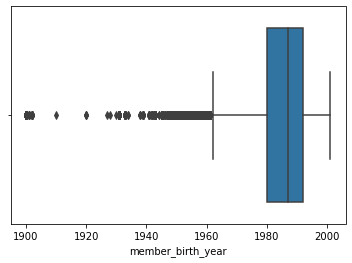

In [5]:
sns.boxplot(df.member_birth_year);

birth year has many outliers as the one in 1878 and so many others
and this maybe a typo or the people rent the bikes  for others

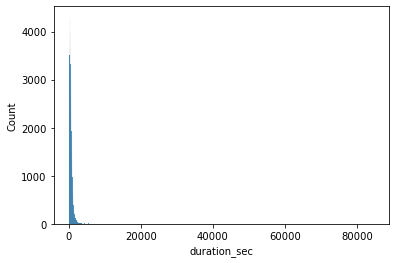

In [6]:
sns.histplot(df.duration_sec);

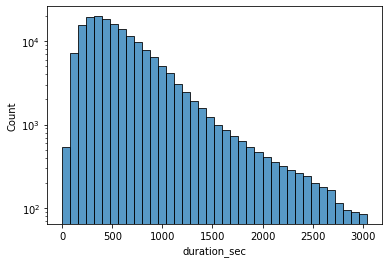

In [7]:
#analyzing duration_sec more as it seems to have mistakes
BINS=np.arange(0,3000+80,80)
sns.histplot(df.duration_sec,bins=BINS)
plt.yscale('log')

Most people ride the bikes for about 200 to 800 seconds 

In [8]:
#df.sort_values('start_time')
#df.start_time.astype()
df.start_time=pd.to_datetime(df.start_time)
df['day']=df.start_time.dt.day



C:\Users\Elrifo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


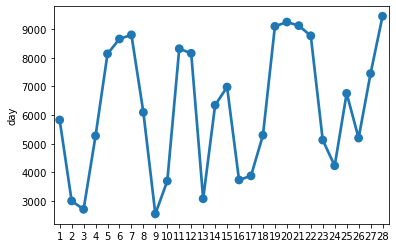

In [25]:
sns.pointplot(df.day.value_counts().index,df.day.value_counts());

In [10]:
df['day_name']=df.start_time.dt.day_name()

C:\Users\Elrifo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='member_gender'>

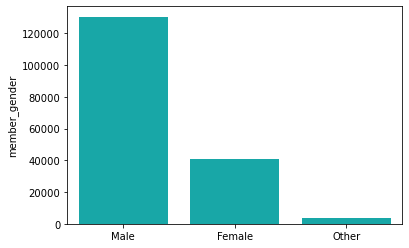

In [11]:
sns.barplot(df.member_gender.value_counts().index,df.member_gender.value_counts(),color='c',)

It's obvious that the most frequent gender is male 

C:\Users\Elrifo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='user_type'>

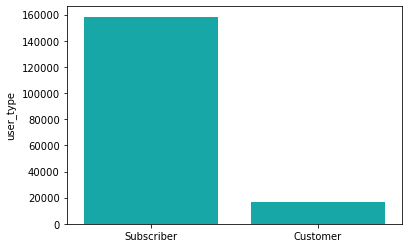

In [12]:
sns.barplot(df.user_type.value_counts().index,df.user_type.value_counts(),color='c',)

Most of the riders are just subscribers 

# Bivariate Exploration

<AxesSubplot:xlabel='member_birth_year', ylabel='duration_sec'>

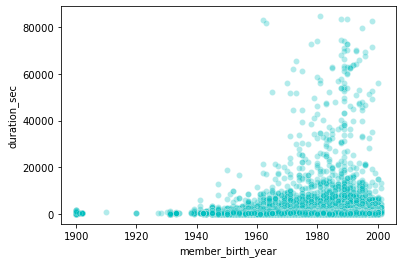

In [13]:
sns.scatterplot(y=df.duration_sec,x=df.member_birth_year,x_jitter=2.6,y_jitter=5.9,alpha=.3,color='c')

As supposed , younger people spend more time riding 

C:\Users\Elrifo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='member_gender', ylabel='duration_sec'>

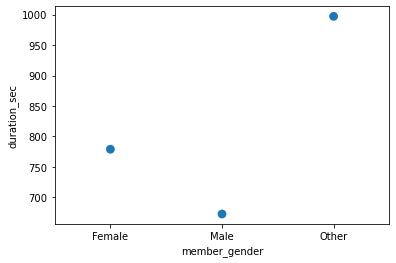

In [14]:
sns.pointplot(df.groupby('member_gender')['duration_sec'].mean().index,df.groupby('member_gender')['duration_sec'].mean(),ci=95,linestyles='')
#sns.scatterplot(y=df.duration_sec,x=df.member_gender,x_jitter=2.6,y_jitter=5.9,alpha=.3,color='c')

# Multivariate Exploration

<AxesSubplot:xlabel='member_birth_year', ylabel='duration_sec'>

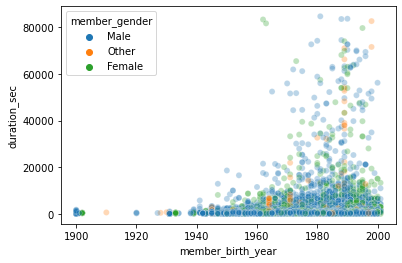

In [15]:
sns.scatterplot(y=df.duration_sec,x=df.member_birth_year,x_jitter=2.6,y_jitter=5.9,alpha=.3,color='c',hue='member_gender',data=df)

In [16]:
df.user_type=df.user_type.astype('category')
df.member_gender=df.member_gender.astype('category')
df.bike_share_for_all_trip=df.bike_share_for_all_trip.astype('category')

df1=pd.get_dummies(df[['user_type','member_gender','bike_share_for_all_trip']])

In [17]:
# joining data after converting it to numeric data
df_join=df.join(df1,how='inner')
df_join=df_join.drop(columns=['bike_share_for_all_trip_No','bike_share_for_all_trip','member_gender_Female','member_gender','user_type','user_type_Subscriber','member_gender_Other'])
df_join.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,member_birth_year,day,day_name,user_type_Customer,member_gender_Male,bike_share_for_all_trip_Yes
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,1984.0,28,Thursday,1,1,0
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,1972.0,28,Thursday,1,1,0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,1989.0,28,Thursday,0,0,0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,1974.0,28,Thursday,0,1,1
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,1959.0,28,Thursday,0,1,0


In [18]:
# most 5 crowded stations
dfMAP=df_join.groupby(['start_station_id']).count().sort_values('duration_sec',ascending=False)[:5]

# **Explanatory Analysis**




# Who ride bikes more ,men or women ?





C:\Users\Elrifo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


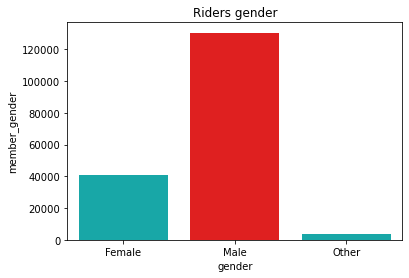

In [26]:
#showing the biggest quantity in red
sns.barplot(df.member_gender.value_counts().index,df.member_gender.value_counts(),palette=['c','r','c'])
plt.xlabel('gender')
plt.title('Riders gender')
plt.show()

As it's indicated men ride bikes more than any oither gender

Which generations are most intersted in riding bikes?

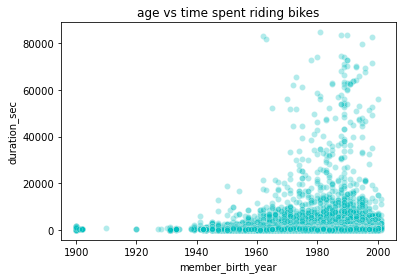

In [27]:
sns.scatterplot(y=df.duration_sec,x=df.member_birth_year,x_jitter=2.6,y_jitter=5.9,alpha=.3,color='c')
plt.title('age vs time spent riding bikes')
plt.show()

The plot shows that younger people are more interested in riding bikes

which gender ride bikes the most ?

C:\Users\Elrifo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


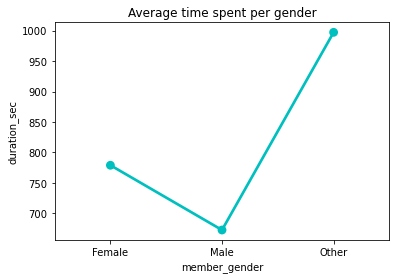

In [28]:
# genders and bikes
#clrs = ['c' if (x < max(df.groupby('member_gender')['duration_sec'].mean())) else 'r' for x in df.groupby('member_gender')['duration_sec'].mean() ]
sns.pointplot(df.groupby('member_gender')['duration_sec'].mean().index,df.groupby('member_gender')['duration_sec'].mean(),color='c')

plt.title('Average time spent per gender')
plt.show()

It's appear that other genders are the most people who ride bikes for long time then Females

How many bikes per station ?

In [22]:
print(' bikes per station  :',df.bike_id.nunique()/df.start_station_id.nunique())

 bikes per station  : 14.00303951367781


What are the 5 most crowded stations?


In [23]:
five=df.start_station_name.value_counts().index[:5]
print('the 5 most busy stations are :',five)

the 5 most busy stations are : Index(['Market St at 10th St',
       'San Francisco Caltrain Station 2  (Townsend St at 4th St)',
       'Berry St at 4th St',
       'Montgomery St BART Station (Market St at 2nd St)',
       'Powell St BART Station (Market St at 4th St)'],
      dtype='object')


Which days do people ride bikes more ?

C:\Users\Elrifo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


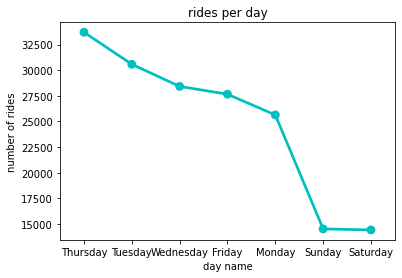

In [29]:
sns.pointplot(df.day_name.value_counts().index,df.day_name.value_counts(),color='c')
plt.ylabel('number of rides')
plt.xlabel('day name')
plt.title('rides per day')
plt.show()

Suprisingly people tend to ride bikes more on thursday which is not a weekend day!